# Topics covered in this notebook
## 1. Feature Selection - initial hypothesis
## 2. Preprocessing - train & test spliting
## 3. Regularizations
## 4. Model Fitting
## 5. Result evaluation
## 6. Summary

# The Boston house prices dataset

In [1]:
# Prepare the dataset
from sklearn import datasets

data = datasets.load_boston()

In [2]:
# See the default description in the dataset
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
import numpy as np
import pandas as pd

# Define features
df = pd.DataFrame(data.data, columns=data.feature_names)

# Define targets
target = pd.DataFrame(data.target, columns=["MEDV"])

In [4]:
# Features
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Targets
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# 1. Feature Selection - initial hypothesis
- 1.1 Numerical Variables
- 1.2 Categorical Variables

## 1.1 Numerical Variables

In [6]:
df['MEDV'] = target
correlation_matrix = df.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

In [7]:
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


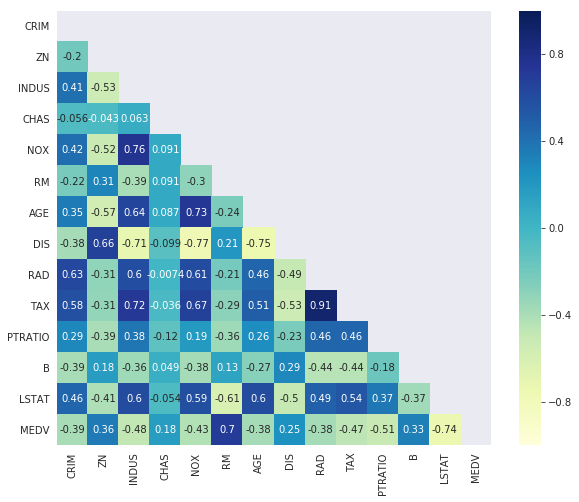

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

with sb.axes_style("darkgrid"):
    fig = plt.figure(figsize=(10,8))
    ax = sb.heatmap(correlation_matrix, mask = mask, 
                    vmin = -1, vmax = 1, square = True,
                    annot = True, cmap = "YlGnBu")

**Conclusion: LSTAT has the highest negative correlation with the MEDV, and RM has the highest positive correlation with the MEDV.**

## 1.2 Categorical Variables

In [10]:
# Notice: CHAS is a boolean type variable
# Notice: RAD is a categorical type variable
for col in df.columns:
    print(len(df[col].unique()), col)

504 CRIM
26 ZN
76 INDUS
2 CHAS
81 NOX
446 RM
356 AGE
412 DIS
9 RAD
66 TAX
46 PTRATIO
357 B
455 LSTAT
229 MEDV


### Categorical Variable: CHAS

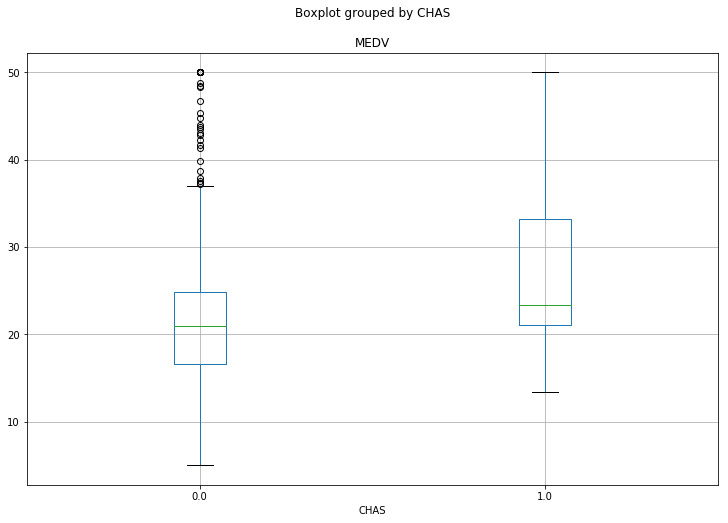

In [11]:
# Feature selection: CHAS
df['MEDV'] = target.values 

# Create a boxplot
df.boxplot('MEDV', by='CHAS', figsize=(12, 8))

In [12]:
# Helper function of performing t-test for comparing two samples' means
from scipy.stats import t
def mean_diff_two_p_t(x1, x2, mudiff, sd1, sd2, n1, n2, equal_var, confidence_alpha, side = 'two'):
    '''
    Outputs: Return t test-statistic, p-value, and confidence intervals of the estimator
    
    Inputs:
        x1: mean of the population 1
        x2: mean of the population 2
        mudiff: mean under the null hypothesis
        sd1: standard deviation of the population 1
        sd2: standard deviation of the population 2
        n1: sample size of the population 1
        n2: sample size of the population 2
        equal_var: equal varaince assumption (either False or True)
        confidence_alpha: usually 0.95
        side: can be either two tail or one tail
    '''
    
    # Hypothesis testing (unequal VS equal variance)
    if equal_var == True:
        pooled_variance = ((n1-1)*sd1**2 + (n2-1)*sd2**2) / (n1+n2-2)
        standard_error = np.sqrt(pooled_variance) * np.sqrt((1/n1) + (1/n2))
        t_stat = ((x1 - x2) - mudiff)/standard_error
        equal_df = n1+n2-2
        
    elif equal_var == False:
        standard_error = np.sqrt((sd1**2 / n1) + (sd2**2 / n2))
        t_stat = ((x1 - x2) - mudiff)/standard_error
        unequal_df = (( (sd1**2 / n1) + (sd2**2 / n2) ) ** 2) / ( (1/(n1-1))*(((sd1**2)/n1)**2) + (1/(n2-1))*(((sd2**2)/n2)**2) ) 
    
    # p-value (equal variance case)
    if (equal_var == True) and (side == 'two'):
        if t_stat >= 0:
            pval = 2*(1-t.cdf(x = t_stat, df = equal_df))
        elif t_stat < 0:
            pval = 2*t.cdf(x = t_stat, df = equal_df)
        
    elif (equal_var == True) and (side == 'less'):
        pval = t.cdf(x = t_stat, df = equal_df)
        
    elif (equal_var == True) and (side == 'larger'):
        pval = 1 - t.cdf(x = t_stat, df = equal_df)
        
    # p-value (unequal variance case)
    if (equal_var == False) and (side == 'two'):
        if t_stat >= 0:
            pval = 2*(1-t.cdf(x = t_stat, df = unequal_df))
        elif t_stat < 0:
            pval = 2*t.cdf(x = t_stat, df = unequal_df)
        
    elif (equal_var == True) and (side == 'less'):
        pval = t.cdf(x = t_stat, df = unequal_df)
        
    elif (equal_var == True) and (side == 'larger'):
        pval = 1 - t.cdf(x = t_stat, df = unequal_df)
    

    # Confidence intervals
    population_difference = x1 - x2
    
    if equal_var == True:
        t_quantile = t.ppf(q = (1 - confidence_alpha)/2, df = equal_df)
    elif equal_var == False:
        t_quantile = t.ppf(q = (1 - confidence_alpha)/2, df = unequal_df)

    margin_error = t_quantile*standard_error
    upper_confidence = population_difference + margin_error
    lower_confidence = population_difference - margin_error
    
    # Final outputs
    return round(t_stat, 3), pval, (upper_confidence, lower_confidence)

In [13]:
# Statistics of two samples

# Numbers
print('Number of data points.')
print(target[df['CHAS'] == 0].shape[0])
print(target[df['CHAS'] != 0].shape[0])
print()

# Means
print('Means.')
print(target[df['CHAS'] == 0].mean())
print(target[df['CHAS'] != 0].mean())
print()

# Standard deviations
print('Standard deviations.')
print(target[df['CHAS'] == 0].std())
print(target[df['CHAS'] != 0].std())
print()

Number of data points.
471
35

Means.
MEDV    22.093843
dtype: float64
MEDV    28.44
dtype: float64

Standard deviations.
MEDV    8.831362
dtype: float64
MEDV    11.816643
dtype: float64



In [14]:
# Outputs: t test-statistic, p-value, and confidence intervals of the estimator
# Conclusion: Variable CHAS has prediction power in distinguishing the target variable
mean_diff_two_p_t(x1=target[df['CHAS'] == 0].mean().values[0], 
                  x2=target[df['CHAS'] != 0].mean().values[0], 
                  mudiff=0, 
                  sd1=target[df['CHAS'] == 0].std().values[0], 
                  sd2=target[df['CHAS'] != 0].std().values[0], 
                  n1=target[df['CHAS'] == 0].shape[0], 
                  n2=target[df['CHAS'] != 0].shape[0], 
                  equal_var=False, 
                  confidence_alpha=0.95, 
                  side = 'two')

(-3.113, 0.003567170098137591, (-10.476830811643861, -2.215483413409177))

### Categorical Variable: RAD

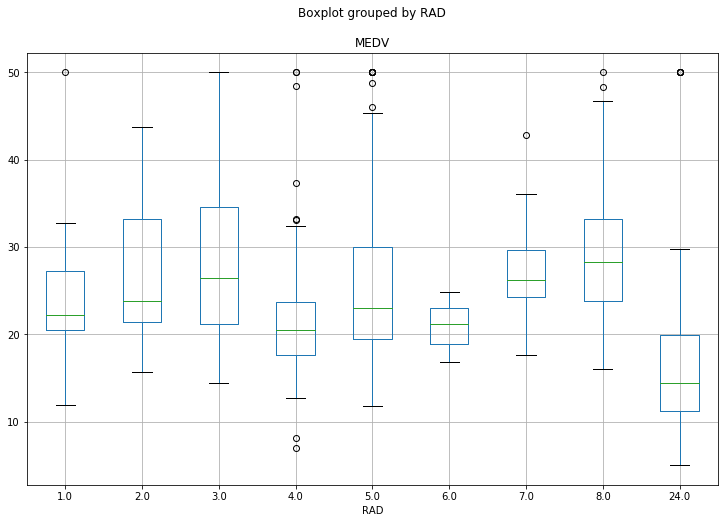

In [15]:
# Create a boxplot
# It's very hard to tell the difference among levels of RAD
# Some are similar to each other, such as 
df.boxplot('MEDV', by='RAD', figsize=(12, 8))

In [16]:
# Data preparations for ANOVA
# Levels of RAD.
grps = pd.unique(df.RAD.values)

# According to each level of RAD, retrieve MEDV values.
d_data = {grp:df['MEDV'][df.RAD == grp].values for grp in grps}

# Make sure the retrieving process is correct!
start = 0
for each in d_data:
    start += (len(d_data[each]))
    
start == df.shape[0]

True

> H0: All samples' means are the same 

> H1: At least one sample mean is different 

In [17]:
# Perform ANOVA 
from scipy import stats
 
F, p = stats.f_oneway(d_data[1.0], d_data[2.0], d_data[3.0],
                      d_data[4.0], d_data[5.0], d_data[6.0],
                      d_data[7.0], d_data[8.0], d_data[24])

# P-value is less than 0.05, thus we should reject the H0
F, p

(18.416047812169236, 3.1256493316010175e-24)

# 2. Preprocessing - train & test spliting

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[0:-1]], df.MEDV, 
                                                    test_size=0.2, random_state=0) 

In [19]:
# Check the splitting is correct!
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [20]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


# 3. Regularizations
- 3.1 Ridge Regularization
- 3.2 Lasso Regularization
- 3.3 Elastic Net Regularization

In [21]:
# Original multiple linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Initiate a linear regression model
model_1=linear_model.LinearRegression()

# Fit the model on train data
model_1.fit(x_train, y_train)

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
# Results on test data
r_squared = model_1.score(x_test, y_test)
predictions = model_1.predict(x_test)
model_1_mse = mean_squared_error(y_true = y_test, y_pred = predictions)

print('Intercept (B0) is {}.'.format(round(model_1.intercept_, 4)))
for i in range(len(df.columns[0:-1])):
    print('{} coefficient is {}.'.format(df.columns[i], round(model_1.coef_.flatten()[i], 4)))
print()
print('R-squared is {}.'.format(round(r_squared, 4)))
print('MSE is {}.'.format(round(model_1_mse, 4)))

Intercept (B0) is 38.0917.
CRIM coefficient is -0.1194.
ZN coefficient is 0.0448.
INDUS coefficient is 0.0055.
CHAS coefficient is 2.3408.
NOX coefficient is -16.1236.
RM coefficient is 3.7087.
AGE coefficient is -0.0031.
DIS coefficient is -1.3864.
RAD coefficient is 0.2442.
TAX coefficient is -0.011.
PTRATIO coefficient is -1.0459.
B coefficient is 0.0081.
LSTAT coefficient is -0.4928.

R-squared is 0.5892.
MSE is 33.449.


## 3.1 Ridge Regularization

$$ Objective (Ridge): Min (Y-X\beta)^T (Y-X\beta) + \lambda \beta^T \beta $$

- Characteristics
    - 1. Can take derivative to get the estimated betas.
    - 2. Coefficients changed smoothly from a small to large lambda. Coefficients shrinked to 0 together.
    - 3. Shrink coefficients of unimportant features faster than Lasso.

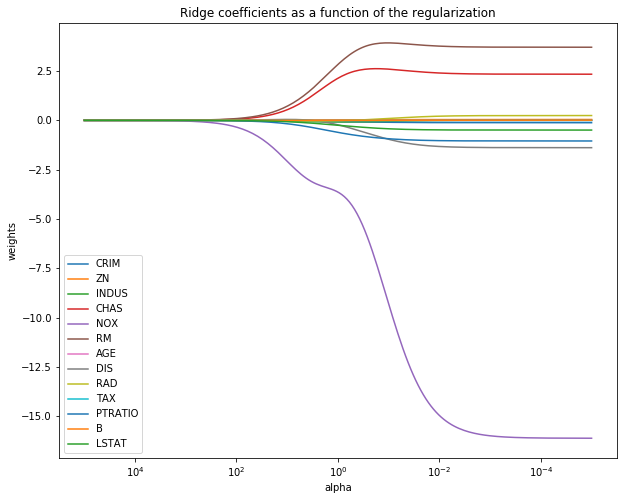

In [23]:
# Regularization: Ridge
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

coefs = []
mses = []
r_scores = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=True, normalize=True)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)
    
    predictions = ridge.predict(x_test)
    r_scores.append(ridge.score(x_test, y_test))
    mses.append(mean_squared_error(y_true = y_test, y_pred = predictions)) 
    
# Display results
plt.figure(figsize=(10,8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(df.columns[0:-1])
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

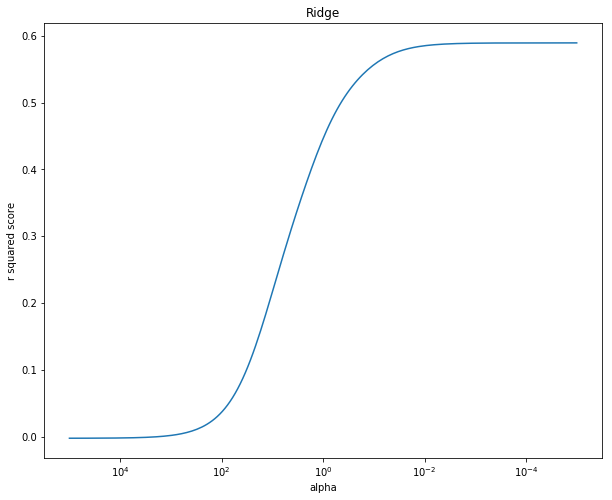

In [24]:
plt.figure(figsize=(10,8))
ax = plt.gca()

ax.plot(alphas, r_scores)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('r squared score')
plt.title('Ridge')
plt.axis('tight')
plt.show()

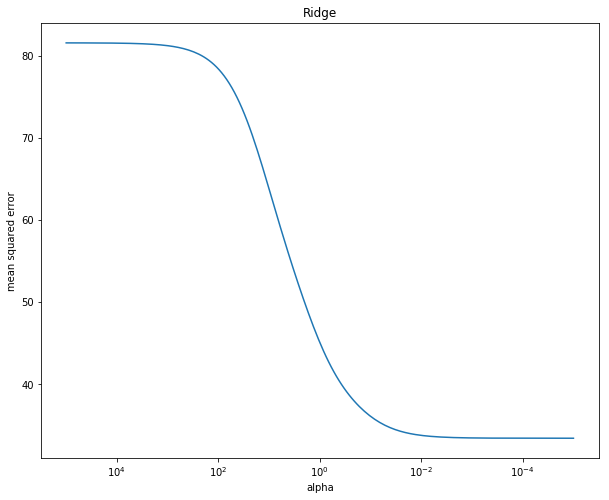

In [26]:
plt.figure(figsize=(10,8))
ax = plt.gca()

ax.plot(alphas, mses)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('mean squared error')
plt.title('Ridge')
plt.axis('tight')
plt.show()

## 3.2 Lasso Regularization

$$ Objective (Lasso): Min (Y-X\beta)^T (Y-X\beta) + \lambda  | \beta |$$

- Characteristics
    - 1. Can't take derivative to get the estimated betas due to absolute mathematical form.
    - 2. Large enough lambda sets some coefficients of unimportant features to be 0.
    - 3. Performs feature selection.

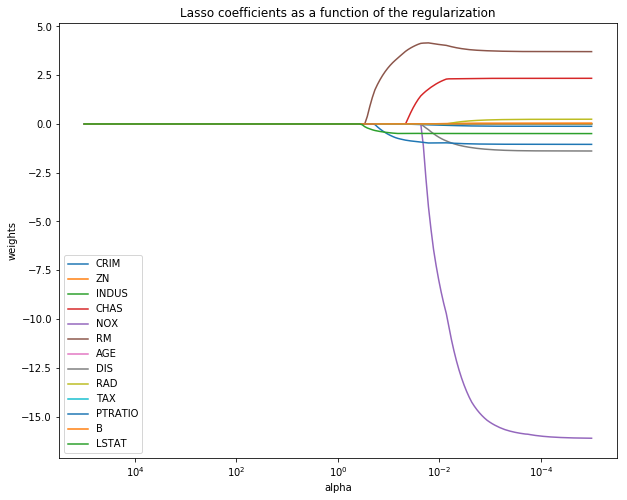

In [27]:
# Regularization: Lasso
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

coefs = []
mses = []
r_scores = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=True, normalize=True)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
    
    predictions = lasso.predict(x_test)
    r_scores.append(lasso.score(x_test, y_test))
    mses.append(mean_squared_error(y_true = y_test, y_pred = predictions))

# Display results
plt.figure(figsize=(10,8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(df.columns[0:-1])
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

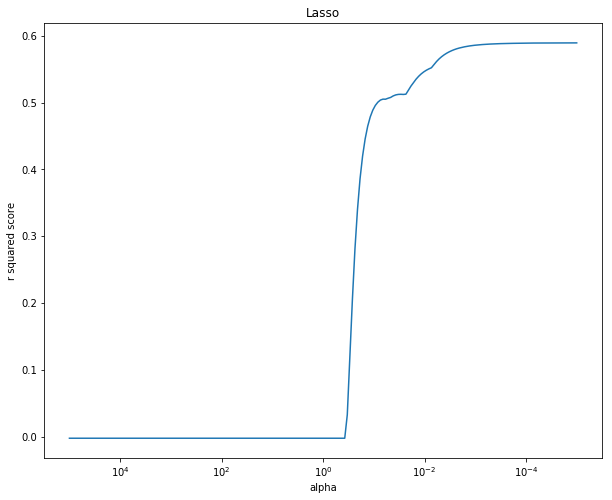

In [28]:
plt.figure(figsize=(10,8))
ax = plt.gca()

ax.plot(alphas, r_scores)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('r squared score')
plt.title('Lasso')
plt.axis('tight')
plt.show()

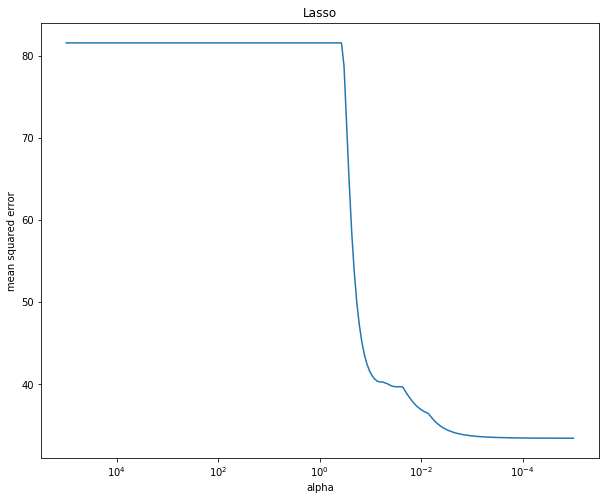

In [29]:
plt.figure(figsize=(10,8))
ax = plt.gca()

ax.plot(alphas, mses)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('mean squared error')
plt.title('Lasso')
plt.axis('tight')
plt.show()

## 3.3 Elastic Net Regularization

$$ Objective (Elastic Net): Min (Y-X\beta)^T (Y-X\beta) + \lambda [(1-\alpha) \beta^T \beta + \alpha | \beta |] $$ 

- Characteristics
    - 1. Combination of both Ridge and Lasso.
    - 2. Advantage to shrink the magnitude of coefficients fast.
    - 3. Advantage to perform feature selection.

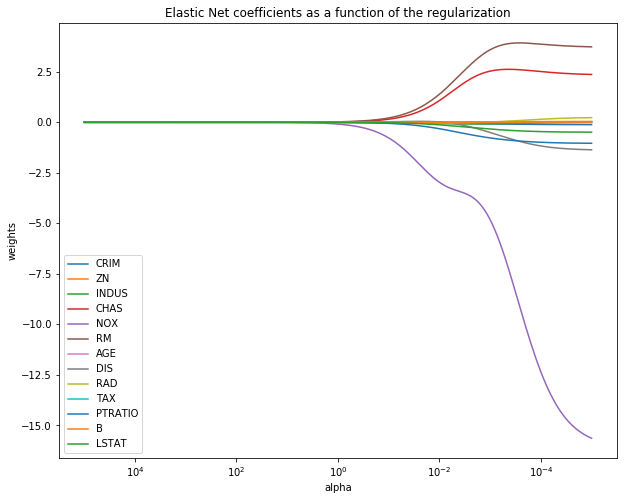

In [30]:
# Regularization: Elastic Net
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)
ratio = np.logspace(-5, 0, n_alphas)

coefs = []
mses = []
r_scores = []
for a, r in zip(alphas,ratio):
    elastic_net = linear_model.ElasticNet(alpha=a, l1_ratio=r, 
                                          fit_intercept=True, normalize=True)
    elastic_net.fit(x_train.values, y_train.values)
    coefs.append(elastic_net.coef_)
    
    predictions = elastic_net.predict(x_test)
    r_scores.append(elastic_net.score(x_test, y_test))
    mses.append(mean_squared_error(y_true = y_test, y_pred = predictions))

# Display results
plt.figure(figsize=(10,8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(df.columns[0:-1])
plt.title('Elastic Net coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

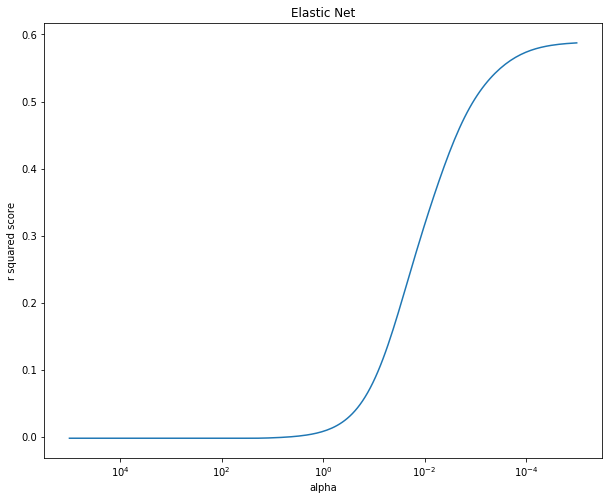

In [31]:
plt.figure(figsize=(10,8))
ax = plt.gca()

ax.plot(alphas, r_scores)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('r squared score')
plt.title('Elastic Net')
plt.axis('tight')
plt.show()

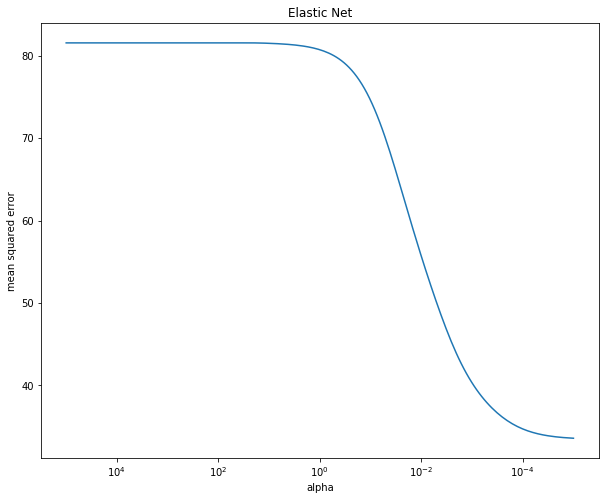

In [32]:
plt.figure(figsize=(10,8))
ax = plt.gca()

ax.plot(alphas, mses)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('mean squared error')
plt.title('Elastic Net')
plt.axis('tight')
plt.show()

# 4. Model Fitting 
- 4.1 Dummy feature generation
- 4.2 Box-cox transformation
- 4.3 Standardization
- 4.4 Bayesian Optimization - hyperparameter tuning
- 4.5 Continue Bayesian Optimization

## 4.1 Dummy feature generation

In [33]:
all_data = df.copy()

x = pd.get_dummies(all_data, columns = ['RAD'])
print(x.shape)

(506, 22)


In [34]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0


## 4.2 Box-cox transformation

In [35]:
from scipy.stats import boxcox

for col in x.columns:
    if col != 'MEDV':
        if np.min(x[col].values) <= 0:
            box_cox_trans_values = boxcox(x[col].values + 1)[0]
        else:
            box_cox_trans_values = boxcox(x[col].values)[0]
        x[col] = box_cox_trans_values
        
    elif col == 'MEDV':
        pass

## 4.3 Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x[x.columns.difference(['MEDV'])])
standardized_data = pd.DataFrame(standardized_data, columns=x.columns.difference(['MEDV']))

In [37]:
print(standardized_data.shape)
standardized_data.head()

(506, 21)


,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD_1.0,...,RAD_24.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RM,TAX,ZN
0,-0.208457,0.627480,-0.272599,-2.495486,0.445390,-1.533636,-1.251389,0.042115,-1.409886,4.929503,...,-0.594089,-0.284950,-0.527046,-0.542326,-0.232737,-0.186453,-0.223142,0.439984,-0.556196,1.605270
1,0.317248,0.627480,-0.272599,-1.454719,0.789572,-0.432889,-0.330207,-0.703055,-0.517903,-0.202860,...,-0.594089,-0.284950,-0.527046,-0.542326,-0.232737,-0.186453,-0.223142,0.224202,-1.175882,-0.599954
2,-0.358904,0.499855,-0.272599,-1.455198,0.789572,-0.432889,-1.543691,-0.703055,-0.517903,-0.202860,...,-0.594089,-0.284950,-0.527046,-0.542326,-0.232737,-0.186453,-0.223142,1.268438,-1.175882,-0.599954
3,-0.888866,0.555866,-0.272599,-1.344671,1.131872,-1.577414,-1.953871,-0.841673,-0.075282,-0.202860,...,-0.594089,3.509386,-0.527046,-0.542326,-0.232737,-0.186453,-0.223142,1.018735,-1.461996,-0.599954
4,-0.604316,0.627480,-0.272599,-0.879209,1.131872,-1.577414,-1.154565,-0.841673,-0.075282,-0.202860,...,-0.594089,3.509386,-0.527046,-0.542326,-0.232737,-0.186453,-0.223142,1.217989,-1.461996,-0.599954


## 4.4 Bayesian Optimization - hyperparameter tuning
- Parameters
    - alpha: Constant that multiplies the penalty terms. (alpha = 0 is equivalent to an ordinary least square)
    - l1_ratio: The ElasticNet mixing parameter.
        - The penalty is an L2 penalty when l1_ratio = 0. 
        - The penalty is an L1 penalty when l1_ratio = 1.
        - The penalty is a combination of L1 and L2 when 0 < l1_ratio < 1.

In [ ]:
# Define the search space
from hyperopt import hp
space = {
    'alpha': hp.uniform('alpha', 0.01, 100.0),
    'l1_ratio': hp.uniform('l1_ratio', 0.0, 1.0)
}

In [ ]:
# Define the objective (here is to minimize mse)
def objective(hyperparameters):
    
    """Objective function for multiple linear regression hyperparameter optimization."""
    
    # Keep track of evals
    global ITERATION
    
    ITERATION += 1
    
    start = timer()
    
    # Perform 5-fold cross validation
    regressor = linear_model.ElasticNet(**hyperparameters)
    cv_results = cross_validate(regressor, standardized_data, all_data.MEDV, 
                                scoring='neg_mean_squared_error', cv=5, 
                                return_train_score=False)
    
    run_time = timer() - start
    
    # Loss must be minimized (put a negative sign)
    loss = -(np.mean(cv_results['test_score']))

    # Write searching results to a csv file ('a' means append)
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, loss])
    of_connection.close()

    # Dictionary with information for evaluation
    return {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'train_time': run_time, 'status': STATUS_OK}

In [ ]:
from hyperopt import Trials

# Record results
trials = Trials()

In [ ]:
# Create a file and open a connection
import csv
OUT_FILE = 'Elastic_Net_ML.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

ITERATION = 0

# Write column names
headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'loss']
writer.writerow(headers)
of_connection.close()

In [ ]:
from hyperopt import tpe
from timeit import default_timer as timer
from hyperopt import STATUS_OK

# Run 200 evaluations
MAX_EVALS = 200

# Global variable
global ITERATION

ITERATION = 0

# Run optimization
from hyperopt import fmin
best = fmin(fn = objective, 
            space = space, 
            algo = tpe.suggest, 
            trials = trials,
            max_evals = MAX_EVALS)

best

In [ ]:
# Sort the trials with the lowest loss first
trials_dict = sorted(trials.results, key = lambda x: x['loss'], reverse=False)
trials_dict[0]

## 4.5 Continue Bayesian Optimization
- Notice: At here, I ran 5000 times in total.

In [ ]:
# Save the trial results to a json file for later continuing training
import json
with open('Elastic_Net_ML.json', 'w') as f:
    f.write(json.dumps(trials_dict))

In [ ]:
# Read back the Trail object
with open('Elastic_Net_ML.json') as f:
    last_x_trail = json.load(f)

# See how many iterations finished before
print(len(last_x_trail))

In [ ]:
# Continue Bayesian Optimization by doing x more times 
# Notice: Must specify the last searched trail object 
MAX_EVALS = 1000
trials = Trials(last_x_trail)

best = fmin(fn = objective, space = space, algo = tpe.suggest, trials = trials,
            max_evals = MAX_EVALS)
best

In [ ]:
# See the lowest loss (mean squared error)
cont_trials_dict = sorted(trials.results, key = lambda x: x['loss'])
cont_trials_dict[0]

In [ ]:
# Append the original searched result
for each_iteration_result in cont_trials_dict:
    trials_dict.append(each_iteration_result)

In [ ]:
# Inspect the number of searching
len(trials_dict)

In [ ]:
# Save the result in a json file
with open('Elastic_Net_ML.json', 'w') as f:
    f.write(json.dumps(trials_dict))

In [ ]:
params_result = pd.read_csv('Elastic_Net_ML.csv')
params_result.head()

In [ ]:
# The optimal model
params_result.sort_values(by = 'loss').head(1)

In [ ]:
params_result.sort_values(by = 'loss').head(1)['hyperparameters'].values

# 5. Result evaluation
- 5.1 Optimal Model Fitting - Cross Validation
- 5.2 Feature hypothesis verification
- 5.3 Bayesian Optimization Visualization

## 5.1 Optimal Model Fitting - Cross Validation

In [38]:
from sklearn.model_selection import cross_validate
scoring = ['neg_mean_squared_error', 'r2']

regressor = linear_model.ElasticNet(alpha=0.16876966590514428, 
                                    l1_ratio=0.4675714525159584, 
                                    fit_intercept=True, normalize=False)

scores = cross_validate(regressor, standardized_data, all_data.MEDV, scoring=scoring,
                        cv=5, return_train_score=False)
scores

{'fit_time': array([0.00549197, 0.00240684, 0.00258994, 0.00288391, 0.00271416]),
 'score_time': array([0.00200915, 0.0016489 , 0.00170398, 0.0019269 , 0.00148296]),
 'test_neg_mean_squared_error': array([-10.7471745 , -19.72769908, -36.54785808, -63.62692415,
        -19.8474737 ]),
 'test_r2': array([0.68880516, 0.78329962, 0.54364921, 0.27459148, 0.25352651])}

In [39]:
print('Average MSE across five folds is {}.'.format(
    round(np.mean(scores['test_neg_mean_squared_error']), 4)))
print('The standard deviation of five test MSE is {}.'.format(
    round(np.std(scores['test_neg_mean_squared_error']), 4)))

Average MSE across five folds is -30.0994.
The standard deviation of five test MSE is 18.7236.


In [40]:
print('Average R-squared score across five folds is {}.'.format(
    round(np.mean(scores['test_r2']), 4)))
print('The standard deviation of five test R-squared scores is {}.'.format(
    round(np.std(scores['test_r2']), 4)))

Average R-squared score across five folds is 0.5088.
The standard deviation of five test R-squared scores is 0.214.


In [41]:
model_1=linear_model.LinearRegression()

scores = cross_validate(model_1, standardized_data, all_data.MEDV, scoring=scoring,
                        cv=5, return_train_score=False)
scores

{'fit_time': array([0.00331187, 0.00281501, 0.00220203, 0.00230384, 0.00188112]),
 'score_time': array([0.00235701, 0.00155282, 0.0019269 , 0.00158024, 0.00131893]),
 'test_neg_mean_squared_error': array([-17.16069769, -19.22102599, -38.21165287, -66.73640997,
        -23.84606878]),
 'test_r2': array([0.50309539, 0.78886521, 0.52287443, 0.23914034, 0.10313733])}

In [42]:
print('Average MSE across five folds is {}.'.format(
    round(np.mean(scores['test_neg_mean_squared_error']), 4)))
print('The standard deviation of five test MSE is {}.'.format(
    round(np.std(scores['test_neg_mean_squared_error']), 4)))

Average MSE across five folds is -33.0352.
The standard deviation of five test MSE is 18.3839.


In [43]:
print('Average R-squared score across five folds is {}.'.format(
    round(np.mean(scores['test_r2']), 4)))
print('The standard deviation of five test R-squared scores is {}.'.format(
    round(np.std(scores['test_r2']), 4)))

Average R-squared score across five folds is 0.4314.
The standard deviation of five test R-squared scores is 0.2392.


## 5.2 Feature hypothesis verification
- Original assumption
    - Originally, I deduced that 'LSTAT' and 'RM' are the top two important features.
    - Also, 'CHAS' and 'RAD' are important features by performing statistical hypothesis testings.
- Model result
    - 'LSTAT' is still the most 'negative' important feature and 'RM' is the most 'positive' important feature.
    - 'CHAS' ranked 2nd place in the positive direction.
    - 'RAD_5.0', 'RAD_24.0', and 'AGE' are the least important features.
- Overall feature summary
    - After read the feature description, I found that it makes sense the model and the initial assumption provides such result.
    - Negative Impact
        - 'LSTAT': % lower status of the population. -> The more % of lower status of population resided in a region, the lower the house median price.
    - Positive Impact
        - 'RM': average number of rooms per dwelling. -> The more rooms per dwelling it has, the higher the house median price.
        - 'CHAS': Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) -> When a house is close to a river, the price is higher. 
    - No Impact
        - 'RAD': index of accessibility to radial highways -> There is no impact on the house median price when the index is 5 or 24.
        - 'AGE': proportion of owner-occupied units built prior to 1940 -> There is no impact on the house median price given any value of proportion of owner-occupied units built prior to 1940.

In [44]:
regressor.fit(standardized_data, all_data.MEDV)
feature_coefs = pd.DataFrame({'feature':regressor.coef_}, index=standardized_data.columns)

In [45]:
(feature_coefs).sort_values(by='feature')

,feature
LSTAT,-4.696797
DIS,-2.036818
PTRATIO,-1.305776
TAX,-0.741927
INDUS,-0.508531
NOX,-0.501058
RAD_1.0,-0.465805
RAD_6.0,-0.164629
RAD_4.0,-0.051333
RAD_2.0,-0.015409


## 5.3 Bayesian Optimization Visualization

### 5.3.1 Figure I: MSE over the course of searching
- Summary 
    - A negative relationship existed between iteration and MSE, indicating that the Bayesian Optimization improved over the course of searching!

In [47]:
params_result = pd.read_csv('Elastic_Net_ML.csv')
params_result.head()

,loss,hyperparameters,iteration,runtime,loss.1
0,96.032782,"{'alpha': 71.43114627770255, 'l1_ratio': 0.923...",1,0.023927,96.032782
1,38.107831,"{'alpha': 1.0970240691444084, 'l1_ratio': 0.39...",2,0.022301,38.107831
2,96.032782,"{'alpha': 87.347807279398, 'l1_ratio': 0.41178...",3,0.042452,96.032782
3,55.684452,"{'alpha': 3.395518569721356, 'l1_ratio': 0.387...",4,0.020375,55.684452
4,96.032782,"{'alpha': 76.47260097032289, 'l1_ratio': 0.463...",5,0.022717,96.032782


/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/wuchenhong/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Validation MSE versus Iteration')

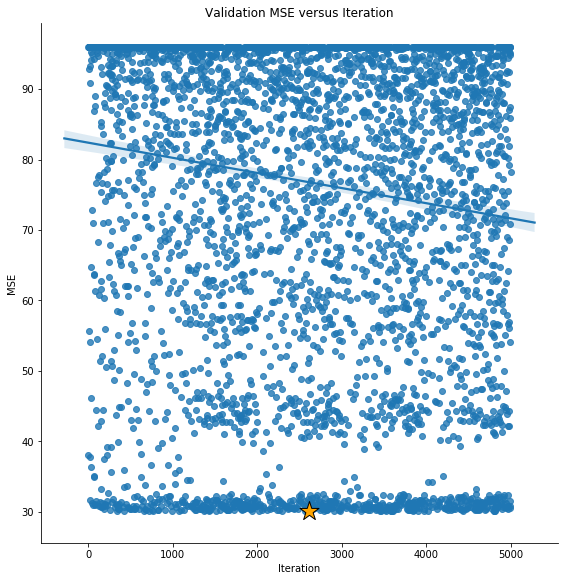

In [48]:
sb.lmplot('iteration', 'loss', data = params_result, size = 8)
plt.scatter(params_result.sort_values(by = 'loss').head(1)['iteration'], 
            params_result.sort_values(by = 'loss').head(1)['loss'], 
            marker = '*', s = 400, c = 'orange', edgecolor = 'k')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title("Validation MSE versus Iteration")

### 5.3.2 Figure II: alpha distribution
- Summary
    - The optimal alpha is close to the peak of the overall searching distribution, indicating that the Bayesian Optimization tend to try parameters which provide favorable result (at here is MSE). 
    - Bayesian Optimization tried more alphas between 0 and 15.

In [49]:
alpha_dist = []
for each in params_result['hyperparameters']:
    alpha_dist.append(float(each[10:20]))
len(alpha_dist)

5000

Text(0.5, 1.0, 'alpha distribution')

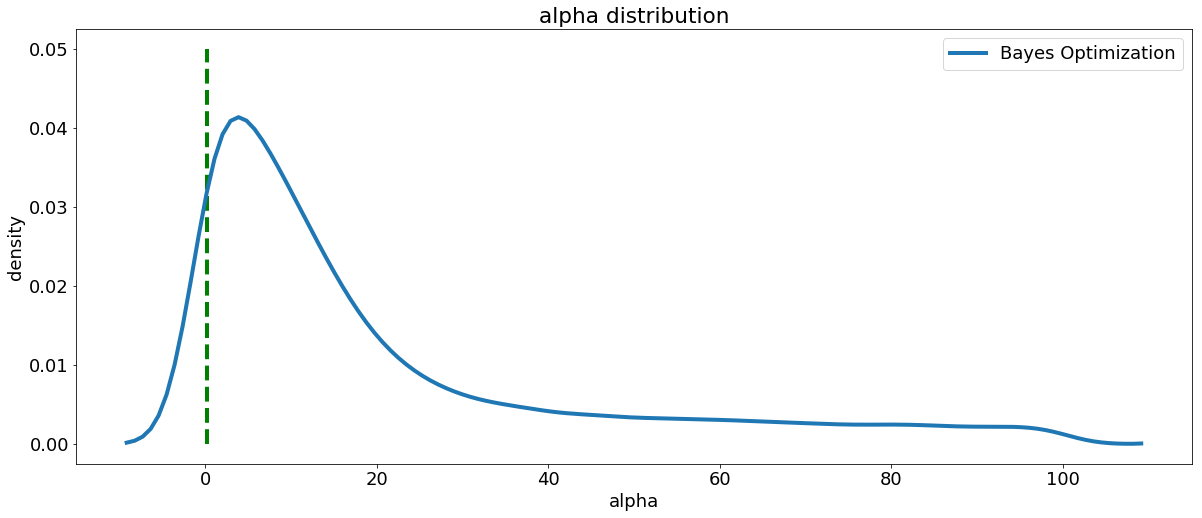

In [50]:
plt.figure(figsize = (20, 8))
plt.rcParams['font.size'] = 18

# Density plots of the learning rate distributions 
sb.kdeplot(alpha_dist, label = 'Bayes Optimization', linewidth = 4)
plt.vlines(float(params_result.sort_values(by = 'loss').head(1)['hyperparameters'].values[0][10:20]),
           ymin = 0, ymax = 0.05, linestyles = '--', linewidth = 4, colors = 'green')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('density')
plt.title('alpha distribution')

- Summary 
    - A positive relationship existed between alpha and MSE. It makes sense that as we increase the alpha, the corresponding MSE tends to be larger because we give 'more' penalty in the error function.

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Validation MSE versus alpha')

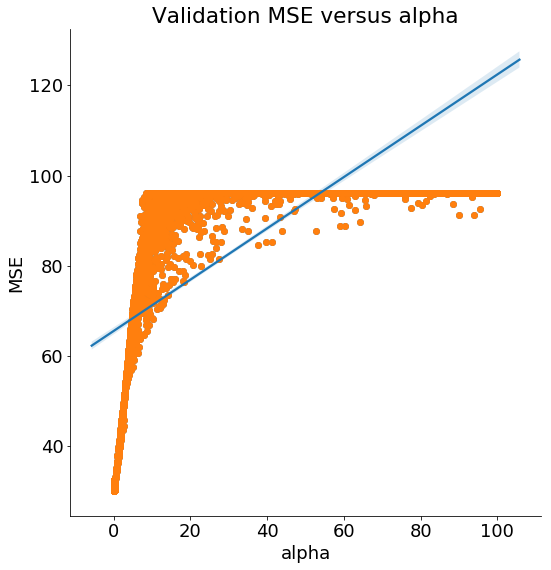

In [51]:
sb.lmplot('alpha', 'loss', data = pd.DataFrame({'alpha':alpha_dist,
                                                'loss': params_result['loss']}),
          size = 8)
plt.scatter(alpha_dist, 
            params_result['loss'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title("Validation MSE versus alpha")

### 5.3.3 Figure III: l1_ratio distribution

- Summary
    - The optimal l1_ratio is located at the peak of the overall searching distribution, indicating that the Bayesian Optimization did achieved the optimal MSE by trying more on the values around the optimal l1_ratio.
    - Bayesian Optimization tried more l1_ratio between 0.4 and 0.6, which means a combination of Lasso and Ridge regularizations is preferable given this dataset. 

In [52]:
l1_ratio_dist = []
for each in params_result['hyperparameters']:
    start_index = each.find('l1_ratio')
    l1_ratio_dist.append(float(each[start_index+11:start_index+11+6]))
len(l1_ratio_dist)

5000

In [53]:
# Inspect the collecting result (the range must be between 0 and 1)
min(l1_ratio_dist), max(l1_ratio_dist)

(0.0002, 0.9991)

Text(0.5, 1.0, 'l1_ratio distribution')

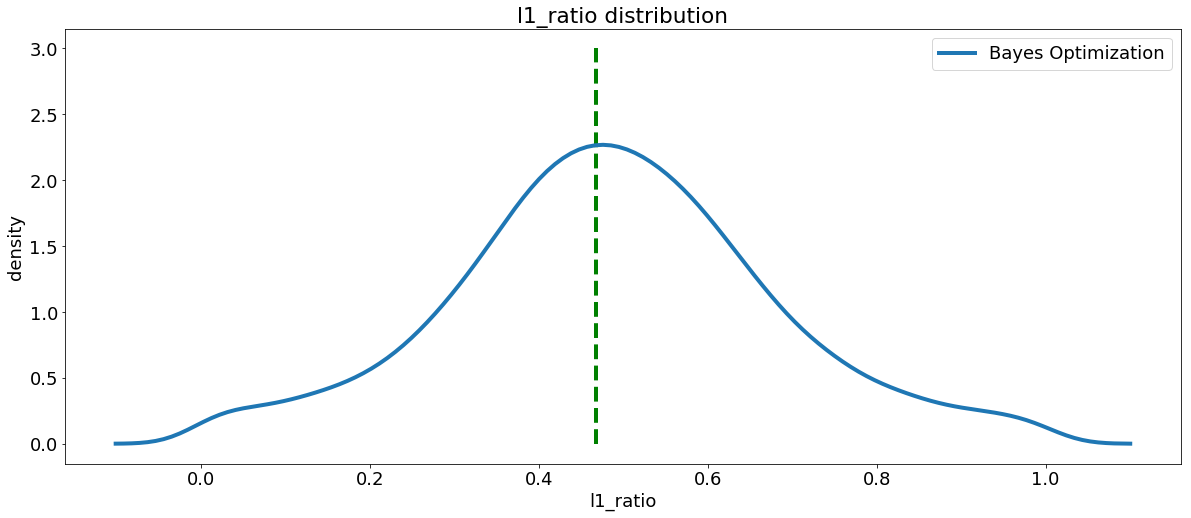

In [54]:
plt.figure(figsize = (20, 8))
plt.rcParams['font.size'] = 18

# Density plots of the learning rate distributions 
sb.kdeplot(l1_ratio_dist, label = 'Bayes Optimization', linewidth = 4)
plt.vlines(0.4675714525159584,
           ymin = 0, ymax = 3, linestyles = '--', linewidth = 4, colors = 'green')
plt.legend()
plt.xlabel('l1_ratio')
plt.ylabel('density')
plt.title('l1_ratio distribution')

# 6. Summary
#### 1. Regularizations: Performing regularized multiple linear regression could solve the multicollinearity issue in some degree by pushing some coefficients of variables to or close to 0.
#### 2. Feature: The main difference in this notebook is that I treated 'RAD' as a categorical variable so I generated the dummy variables given levels.
#### 3. Feature selection: The most important issue. It's always good to have some initial assumptions and then validate them from the model. 
#### 4. Bayesian Optimization: It's efficient at searching hyperparameters in a model. After attained the searching result, we need to further inspect whether it's reasonable or not.